## Project Supply Chain -- First Data Exploration

**Exploration of metadata (without Text Mining technics)**
Some ideas:

- Response rate, influence of brand or source, verified_purchase or not
<br> <span style="color: blue"> We took a look at verified purchases and how the reviewers rated differently </span>

- Distribution of scores.
<br> <span style="color: blue"> We took a look at the distribution of scores in various scenarios </span>

- Influence of the marketplace or the company on the distribution of notes (hypothesis testin could be used for  this kind of analysis )
<br> <span style="color: blue"> We only have information about wether the reviewers were selected by the company or not, which we took a look at </span>

- Information about the 10 most active users, with a small analysis on it (distribution of scores, response rate, company...).
<br> <span style="color: blue"> We looked at the 10 most active users </span>

**Goal 2 Analysis of text (and cleaning if necessary ). You will need to complete the text mining module to be able to do this part.**
Some ideas :
- Analyze the punctuation according to the note

- Analyze the length of the text (nb character, nb words...) according to the note.

- Analyze the frequency of email addresses, links, phone numbers...

- Occurrence of words, wordcloud...
We did a word cloud already to have an overview and saw that we need to improve on stop-words

- N-gram

- Occurrence of some words : delivery order, return order, delivery, SAV, customer service...

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
import os
project_path = os.path.abspath(os.path.join(os.getcwd(), os.path.pardir, os.path.pardir)).replace('\\', '/')
project_path

'D:/Ling/Study/AZ_DATASCIENCE_ACADEMY/project_supply_chain'

In [4]:
data_hc = pd.read_csv(project_path + r"/data/amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
data_dc = pd.read_csv(project_path + r"/data/amazon_reviews_us_Digital_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
data_raw = pd.concat([data_hc,data_dc], axis = 0)

C:\Users\Ling\AppData\Local\Temp\ipykernel_15072\667229618.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data_hc = pd.read_csv(project_path + r"/data/amazon_reviews_us_Video_Games_v1_00.tsv", sep="\t", error_bad_lines=False)
b'Skipping line 20630: expected 15 fields, saw 22\nSkipping line 28172: expected 15 fields, saw 22\nSkipping line 54791: expected 15 fields, saw 22\n'
b'Skipping line 75419: expected 15 fields, saw 22\nSkipping line 104832: expected 15 fields, saw 22\n'
b'Skipping line 138464: expected 15 fields, saw 22\nSkipping line 194849: expected 15 fields, saw 22\n'
b'Skipping line 201568: expected 15 fields, saw 22\nSkipping line 242567: expected 15 fields, saw 22\n'
b'Skipping line 493585: expected 15 fields, saw 22\nSkipping line 502478: expected 15 fields, saw 22\n'
b'Skipping line 660750: expected 15 fields, saw 22\n'
C:\Users\Ling\AppData\Local\Temp\ipykernel_15072\66722

### explore data

In [5]:
data_raw.shape

(1924992, 15)

In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1924992 entries, 0 to 144723
Data columns (total 15 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   marketplace        object
 1   customer_id        int64 
 2   review_id          object
 3   product_id         object
 4   product_parent     int64 
 5   product_title      object
 6   product_category   object
 7   star_rating        int64 
 8   helpful_votes      int64 
 9   total_votes        int64 
 10  vine               object
 11  verified_purchase  object
 12  review_headline    object
 13  review_body        object
 14  review_date        object
dtypes: int64(5), object(10)
memory usage: 235.0+ MB


In [7]:
data_raw.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31
1,US,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31
2,US,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31
3,US,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31
4,US,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31


In [10]:
# check null data
print(data_raw.isnull().sum(axis = 0) / len(data) * 100)

marketplace          0.000000
customer_id          0.000000
review_id            0.000000
product_id           0.000000
product_parent       0.000000
product_title        0.000000
product_category     0.000000
star_rating          0.000000
helpful_votes        0.000000
total_votes          0.000000
vine                 0.000000
verified_purchase    0.000000
review_headline      0.001559
review_body          0.003169
review_date          0.001559
dtype: float64


In [62]:
# drop missing data, since the amount of missing data is very low
data = data_raw.dropna(axis = 0)

#### check data quality and clean data

In [12]:
# check duplicates
print(data["marketplace"].value_counts()) #Only data from us marketplace, so we can drop the row
print("number of duplicated customer ids = \n", len(data[data['customer_id'].duplicated() == True])) #most likely because customers ordered multiple items
print("number of duplicated review ids = \n", len(data[data['review_id'].duplicated() == True])) 
#has to be 0 in order to ensure the ID is unique, i think we can drop this row as well in this case
#placeholder for code that shows if product_id, product_title and product_parent are fully correlated
print("product_category: \n", data["product_category"].value_counts())
print("star rating: \n", data["star_rating"].value_counts())
print("vines: \n",data["vine"].value_counts())
print("verified_purchases: \n",data["verified_purchase"].value_counts())

US    1924871
Name: marketplace, dtype: int64
number of duplicated customer ids = 
 798982
number of duplicated review ids = 
 0
product_category: 
 Video Games            1780154
Digital_Video_Games     144717
Name: product_category, dtype: int64
star rating: 
 5    1103331
4     337771
1     216459
3     165032
2     102278
Name: star_rating, dtype: int64
vines: 
 N    1920587
Y       4284
Name: vine, dtype: int64
verified_purchases: 
 Y    1288358
N     636513
Name: verified_purchase, dtype: int64


In [63]:
# drop the rows we do not need for this analysis or our model
to_drop = ["marketplace"] # we did not drop "review_id", "product_id", "product_parent" for now as they might 
#still be usefull going forward
data = data.drop(to_drop, axis=1)

#### Reviews per product

In [38]:
reviews_per_product = data.groupby(["product_id"])["review_id"].nunique().reset_index(name="num_of_reviews").\
    sort_values(by=(['num_of_reviews']), ascending=False)
reviews_per_product.head()

,product_id,num_of_reviews
56858,B00BGA9WK2,10317
36110,B002VBWIP6,5085
44335,B004RMK4BC,5039
50298,B007FTE2VW,3971
27498,B00178630A,3715


In [39]:
reviews_per_product["num_of_reviews"].quantile([0.01,0.1,0.25, 0.5,0.75,0.9,0.99])

0.01      1.00
0.10      1.00
0.25      1.00
0.50      4.00
0.75     15.00
0.90     51.00
0.99    382.81
Name: num_of_reviews, dtype: float64

#### countplot of various data

<AxesSubplot: xlabel='product_category', ylabel='count'>

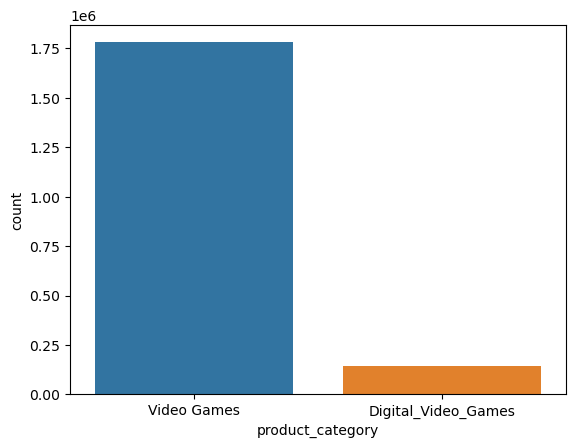

In [40]:
sns.countplot(x=data["product_category"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

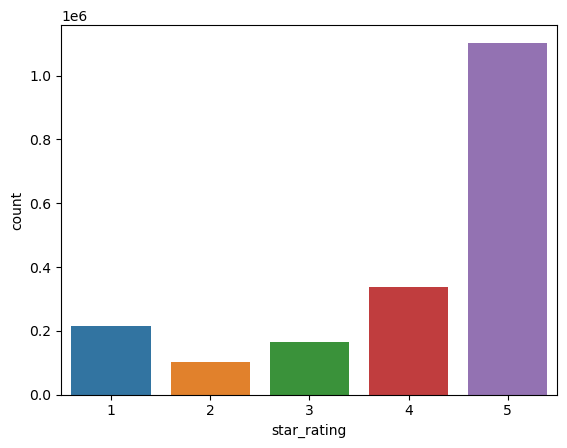

In [41]:
sns.countplot(x=data["star_rating"])

<AxesSubplot: xlabel='verified_purchase', ylabel='count'>

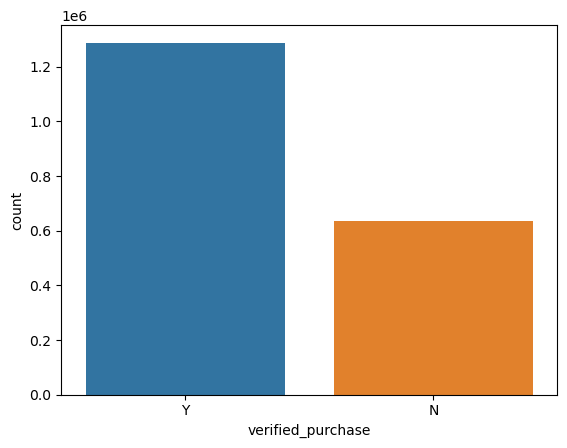

In [42]:
sns.countplot(x=data["verified_purchase"])
#there are a lot of non-verified purchases 
#let's look at how the rating distribution of these reviews looks like compared to the verified ones

<AxesSubplot: xlabel='star_rating', ylabel='count'>

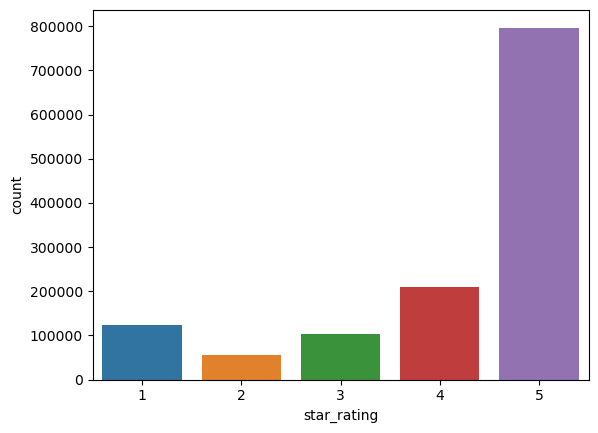

In [43]:
sns.countplot(x=data[data["verified_purchase"]=="Y"]["star_rating"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

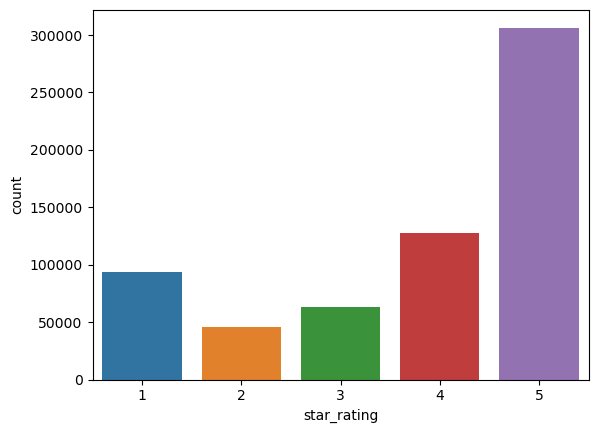

In [44]:
sns.countplot(x=data[data["verified_purchase"]=="N"]["star_rating"])
#there are a lot more lower ratings in comparison. 
#It is possible that customers were so unhappy, that they created a 2nd account just to review the game negatively again

<AxesSubplot: xlabel='star_rating', ylabel='count'>

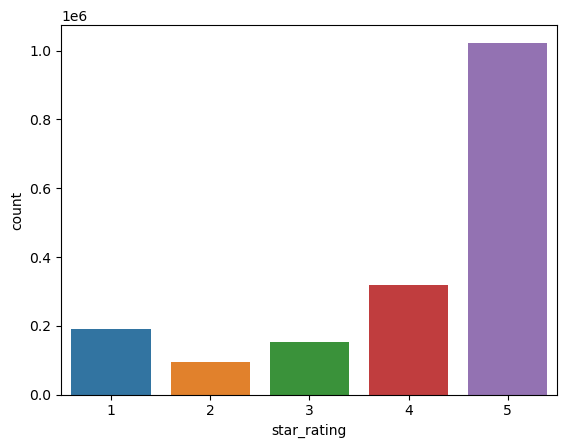

In [45]:
#there are definitely more hard-copy sales than digital sales, let's look at the ratings from the reviews for each one
sns.countplot(x=data[data["product_category"]=="Video Games"]["star_rating"])

<AxesSubplot: xlabel='star_rating', ylabel='count'>

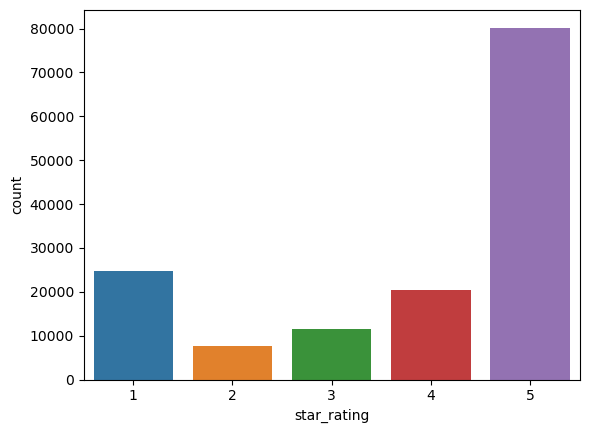

In [46]:
sns.countplot(x=data[data["product_category"]=="Digital_Video_Games"]["star_rating"])
#we can see from this simple analysis, that there are a lot more 1-star reviews for digital products

#### reviews over time

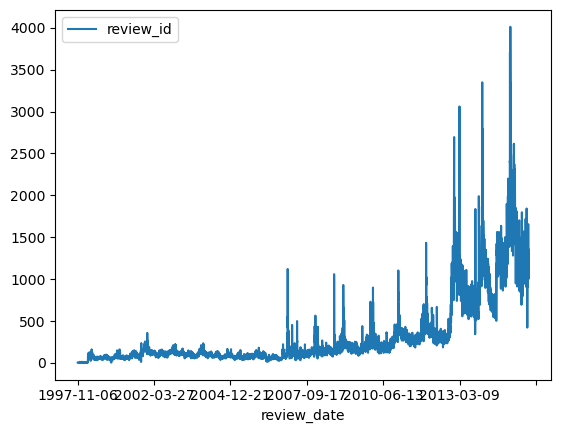

In [47]:
reviews_over_time = data.groupby("review_date").agg({"review_id":"count"}).plot(kind="line")

<AxesSubplot: title={'center': 'Reviews per product'}, xlabel='star_rating'>

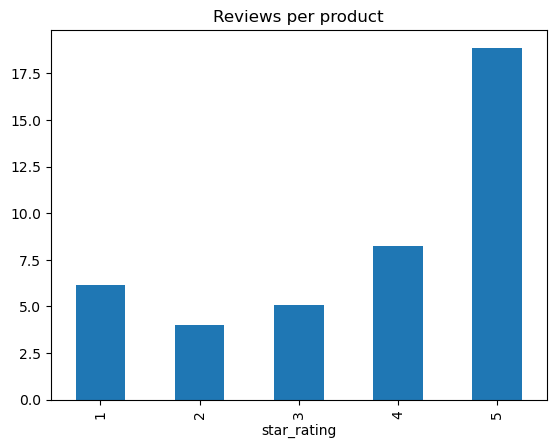

In [48]:
num_rev_prod_per_rating = data.groupby("star_rating").agg({"review_id":lambda x: x.nunique(), "product_id": lambda x: x.nunique()} )
num_rev_prod_per_rating["rev_per_prod"] = num_rev_prod_per_rating.apply(lambda x: x["review_id"] / x["product_id"], axis=1)
num_rev_prod_per_rating["rev_per_prod"].plot(kind="bar", title="Reviews per product")
#reviews per product by rating class, customers seem to review more often when they are happy

#### 10 most rated titles

<AxesSubplot: >

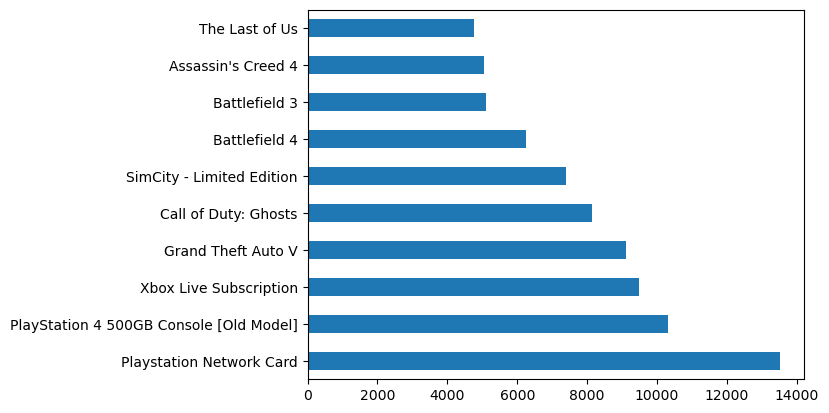

In [49]:
data["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles where the reviews recieved the most votes

<AxesSubplot: ylabel='product_title'>

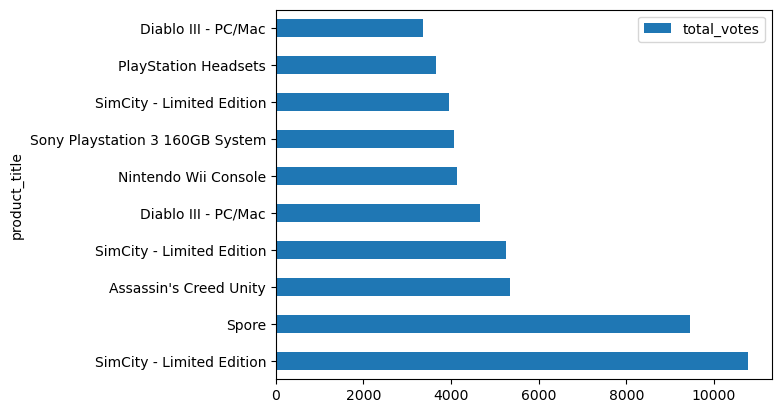

In [50]:
data[["product_title", "total_votes"]].nlargest(10, ["total_votes"]).plot(x="product_title", y="total_votes", kind="barh")

#### Top 10 titles have the most 5-star reviews

<AxesSubplot: >

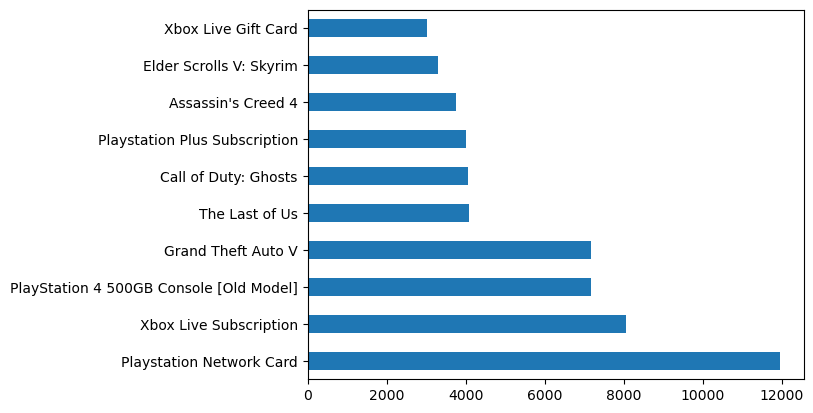

In [51]:
data[data["star_rating"] == 5]["product_title"].value_counts().head(10).plot(kind="barh")

#### Top 10 titles with the lowest rated reviews

<AxesSubplot: >

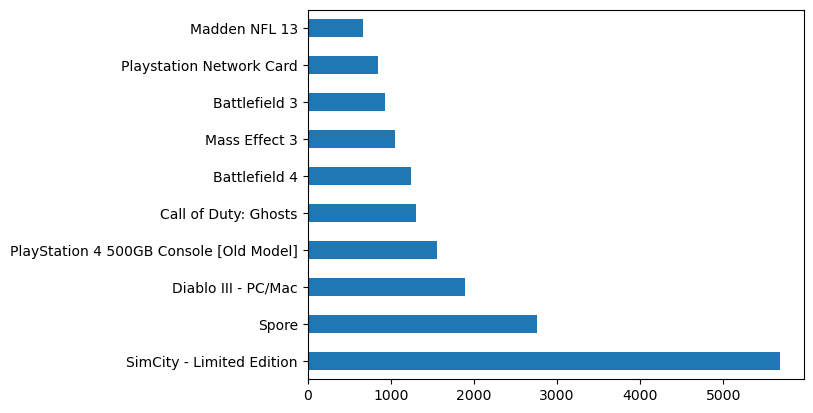

In [52]:
data[data["star_rating"] == 1]["product_title"].value_counts().head(10).plot(kind="barh")
#that's where SimCity went, reviewers did not like this game at all

#### Top 10 games with the most helpful reviews

<AxesSubplot: ylabel='product_title'>

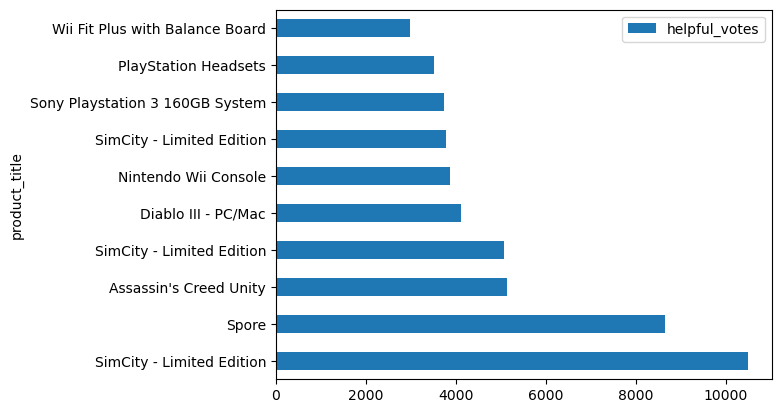

In [53]:
data[["product_title", "helpful_votes"]].nlargest(10, ["helpful_votes"]).plot(x="product_title", y="helpful_votes", kind="barh")
#Customers found reviews of SimCity the most helpful allthough the game also had a lot of bad reviews. this again shows that 
#this title was highly controversial

<AxesSubplot: xlabel='vine', ylabel='Percent'>

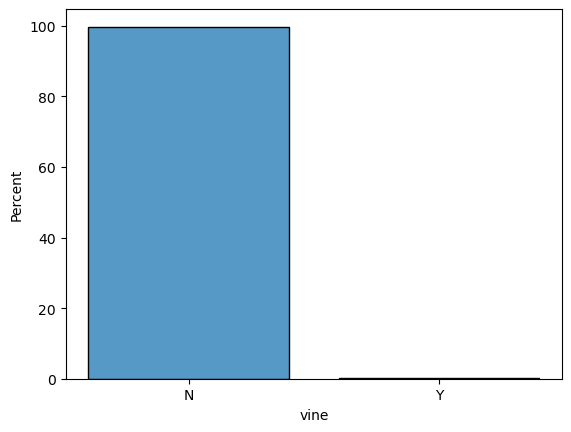

In [54]:
#now we will look at the distribution of vine reviews to non-vine reviews
sns.histplot(data, x="vine", stat="percent", multiple="dodge", shrink=0.8)

<AxesSubplot: xlabel='star_rating', ylabel='Percent'>

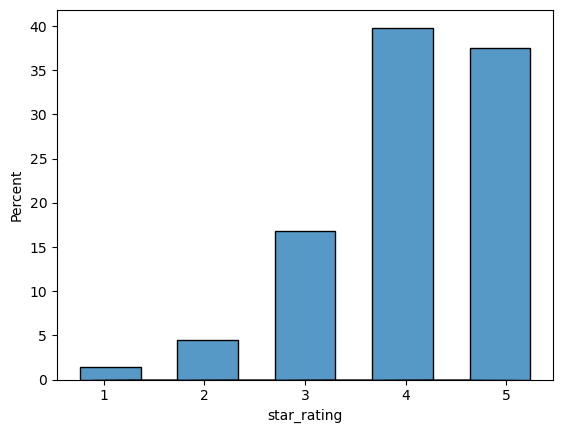

In [55]:
sns.histplot(data[data["vine"]=="Y"], x="star_rating", stat="percent", multiple="dodge", shrink=5)

<AxesSubplot: xlabel='star_rating', ylabel='Percent'>

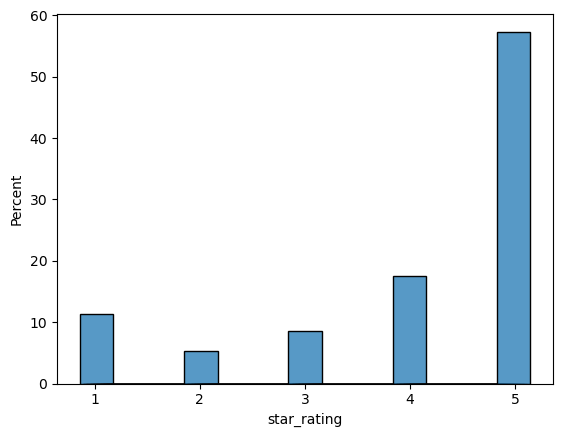

In [56]:
sns.histplot(data[data["vine"]=="N"], x="star_rating", stat="percent", multiple="dodge", shrink=10)
#we can see that the vine reviews are more likely to give 3, 4 or 5 stars compared to the non-vine reviews

### tokenization and stemming of review_body

In [57]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import EnglishStemmer
stemmer = EnglishStemmer()


stop_words.update(["car", "work", "product", "install"])

def tokenization_and_stemming(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string 
    for word in word_tokenize(text):
        if word.lower() not in stop_words:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha(): # filter out non alphabet words like emoji
            filtered_tokens.append(token)
            
    # stemming
    # Removes ing also in anything ...
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return_string = " ".join(stems)
    
    return return_string

In [58]:
df_review_body = data.dropna(subset=['review_body'])

In [59]:
df_review_body["processed_reviews"] = df_review_body["review_body"].apply(lambda x: tokenization_and_stemming(x))

In [60]:
df_review_body.head()

,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,processed_reviews
0,12039526,RTIS3L2M1F5SM,B001CXYMFS,737716809,Thrustmaster T-Flight Hotas X Flight Stick,Video Games,5,0,0,N,Y,an amazing joystick. I especially love that yo...,"Used this for Elite Dangerous on my mac, an am...",2015-08-31,use elit danger mac amaz joystick especi love ...
1,9636577,R1ZV7R40OLHKD,B00M920ND6,569686175,Tonsee 6 buttons Wireless Optical Silent Gamin...,Video Games,5,0,0,N,Y,Definitely a silent mouse... Not a single clic...,"Loved it, I didn't even realise it was a gami...",2015-08-31,love even realis game mous type silent mous se...
2,2331478,R3BH071QLH8QMC,B0029CSOD2,98937668,Hidden Mysteries: Titanic Secrets of the Fatef...,Video Games,1,0,1,N,Y,One Star,poor quality work and not as it is advertised.,2015-08-31,poor qualiti advertis
3,52495923,R127K9NTSXA2YH,B00GOOSV98,23143350,GelTabz Performance Thumb Grips - PlayStation ...,Video Games,3,0,0,N,Y,"good, but could be bettee","nice, but tend to slip away from stick in inte...",2015-08-31,nice tend slip away stick intens hard press ga...
4,14533949,R32ZWUXDJPW27Q,B00Y074JOM,821342511,Zero Suit Samus amiibo - Japan Import (Super S...,Video Games,4,0,0,N,Y,Great but flawed.,"Great amiibo, great for collecting. Quality ma...",2015-08-31,great amiibo great collect qualiti materi desi...


### word cloud of processed_reviews

In [66]:
df_review_body.columns

Index(['customer_id', 'review_id', 'product_id', 'product_parent',
       'product_title', 'product_category', 'star_rating', 'helpful_votes',
       'total_votes', 'vine', 'verified_purchase', 'review_headline',
       'review_body', 'review_date', 'processed_reviews'],
      dtype='object')

In [67]:
df_processed_reviews = df_review_body.dropna(subset="processed_reviews")
processed_review_string = df_processed_reviews.groupby("star_rating").aggregate({"processed_reviews":lambda x: " \n ".join(x)})

In [74]:
def wc_for_rating(rating):
    wordcloud = WordCloud(collocations=True).generate(processed_review_string.loc[rating][0][1:5000000].replace("one", "").replace("use", "").replace(" br ", " ").replace("car", "").replace("work", ""))
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

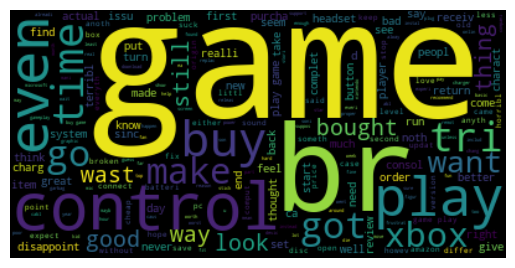

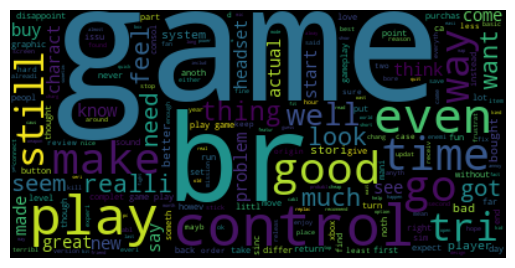

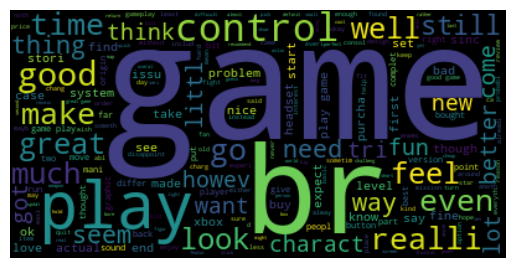

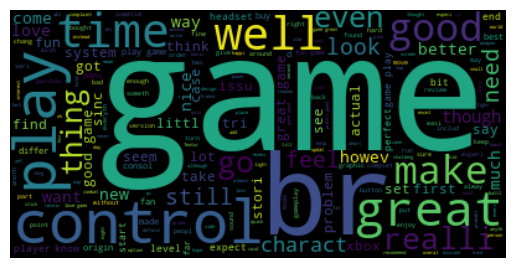

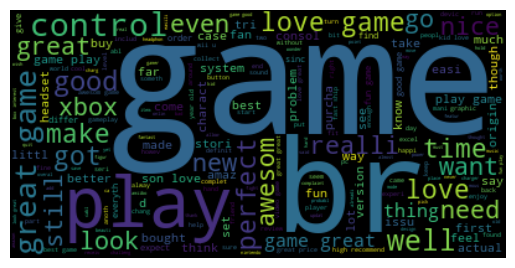

In [75]:
wc_for_rating(1)
wc_for_rating(2)
wc_for_rating(3)
wc_for_rating(4)
wc_for_rating(5)

In [76]:
STOP -- end of code

SyntaxError: invalid syntax (878011331.py, line 1)